# AI-MAJOR-AUG-AI08B5.

In [ ]:
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils

Using TensorFlow backend.


In [ ]:
df=pd.read_csv('C:/Users/KIIT/Documents/VERZEO/AI MAJOR/fer2013.csv')

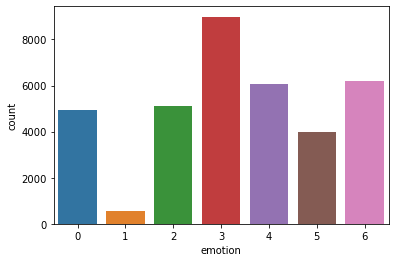

In [ ]:
graph = sb.countplot(x='emotion',data=df)
plt.show()

In [ ]:
df = df[df.emotion != 1]

In [ ]:
df.replace(2,1, inplace=True)
df.replace(3,2, inplace=True)
df.replace(4,3, inplace=True)
df.replace(5,4, inplace=True)
df.replace(6,5, inplace=True)

In [ ]:
emotion_label_to_text = {0:'angry', 1:'fear', 2:'happy', 3: 'sad', 4: 'surprise', 5: 'neutral'}

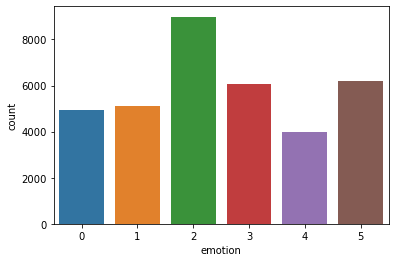

In [ ]:
graph = sb.countplot(x='emotion',data=df)
plt.show()

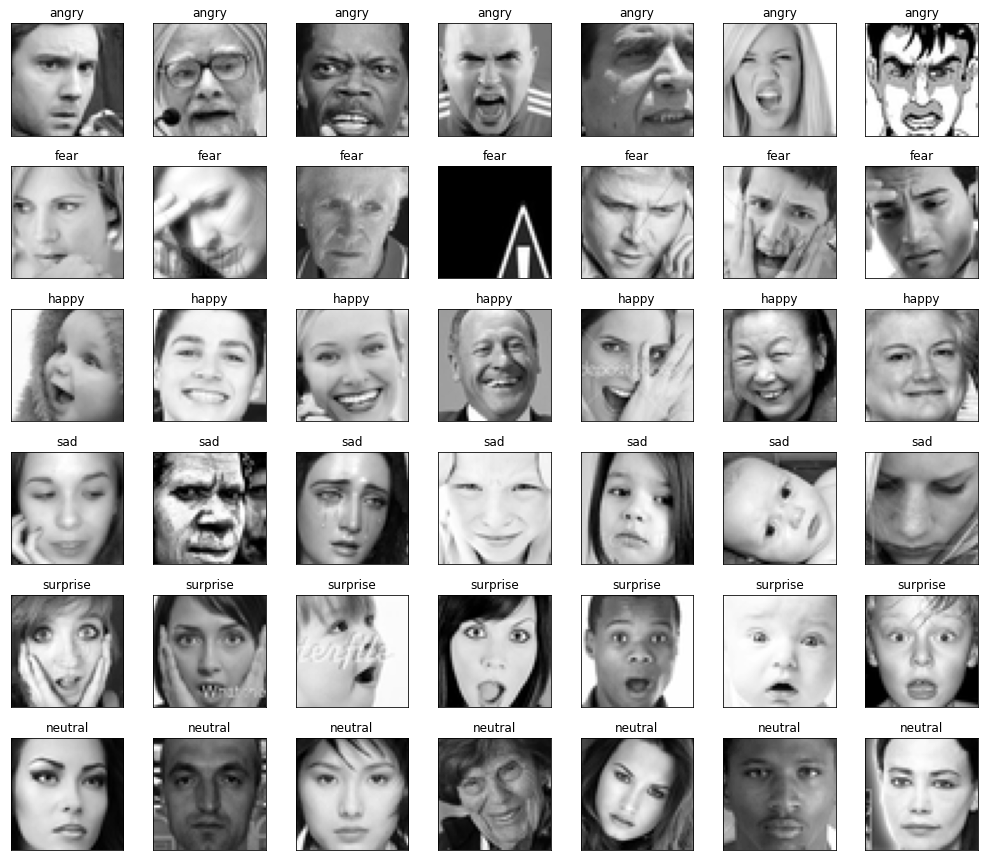

In [ ]:
fig = plt.figure(1, (14, 14))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(7):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        plt.tight_layout()

In [ ]:
X_train,Y_train,X_test,Y_test=[],[],[],[]

In [ ]:
for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           Y_train.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           Y_test.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")

In [ ]:
df.describe()

,emotion
count,35340.000000
mean,2.499377
std,1.630823
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


In [ ]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,1,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,3,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,5,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35340 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35340 non-null  int64 
 1   pixels   35340 non-null  object
 2   Usage    35340 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


In [ ]:
print(df.isnull().sum())

emotion    0
pixels     0
Usage      0
dtype: int64


In [ ]:
num_features = 64
num_labels = 7
batch_size = 32
epochs = 50
width, height = 48, 48

In [ ]:
X_train = np.array(X_train,'float32')
Y_train = np.array(Y_train,'float32')
X_test = np.array(X_test,'float32')
Y_test = np.array(Y_test,'float32')

In [ ]:
Y_train=np_utils.to_categorical(Y_train, num_classes=num_labels)
Y_test=np_utils.to_categorical(Y_test, num_classes=num_labels)

In [ ]:
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

In [ ]:
X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(Y_test.shape)
print(X_test.shape)

(28273, 48, 48, 1)
(28273, 7)
(3533, 7)
(3533, 48, 48, 1)


In [ ]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))


In [ ]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

In [ ]:
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_labels, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)         

In [ ]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test),
          shuffle=True)


Train on 28273 samples, validate on 3533 samples
Epoch 1/50
28273/28273 [==============================] - 299s 11ms/step - loss: 1.6749 - accuracy: 0.2934 - val_loss: 1.5036 - val_accuracy: 0.3932
Epoch 2/50
28273/28273 [==============================] - 354s 13ms/step - loss: 1.4624 - accuracy: 0.4071 - val_loss: 1.3633 - val_accuracy: 0.4416
Epoch 3/50
28273/28273 [==============================] - 308s 11ms/step - loss: 1.3762 - accuracy: 0.4506 - val_loss: 1.3489 - val_accuracy: 0.4667
Epoch 4/50
28273/28273 [==============================] - 317s 11ms/step - loss: 1.3259 - accuracy: 0.4744 - val_loss: 1.2480 - val_accuracy: 0.5069
Epoch 5/50
28273/28273 [==============================] - 362s 13ms/step - loss: 1.2951 - accuracy: 0.4888 - val_loss: 1.2231 - val_accuracy: 0.5219
Epoch 6/50
28273/28273 [==============================] - 387s 14ms/step - loss: 1.2654 - accuracy: 0.5026 - val_loss: 1.2009 - val_accuracy: 0.5318
Epoch 7/50
28273/28273 [==============================] -

In [ ]:
fer_json = model.to_json()
with open("fer.json","w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")    

In [ ]:

def plot_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)


# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training_accuracy', 'validation_accuracy'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'validation_loss'], loc='upper right')
plt.show()



In [ ]:
def get_best_epoch(history):
    valid_acc = history.history['val_accuracy']
    best_epoch = valid_acc.index(max(valid_acc)) + 1
    best_acc =  max(valid_acc)
    print('Best Validation Accuracy Score {:0.5f}, is for epoch {}'.format( best_acc, best_epoch))
    return best_epoch

In [ ]:
get_best_epoch(history)


In [ ]:
import cv2
from keras.models import model_from_json
from keras.preprocessing import image

In [ ]:
model = model_from_json(open("fer.json", "r").read())

In [ ]:
model.load_weights('fer.h5')

In [ ]:
face_haar_cascade = cv2.CascadeClassifier('C:/Users/KIIT/Documents/VERZEO/AI MAJOR/haarcascade_frontalface_default.xml')

In [ ]:
cap=cv2.VideoCapture(0)
while True:
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image
    if not ret:
        continue
    gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)


    for (x,y,w,h) in faces_detected:
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
        roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
        roi_gray=cv2.resize(roi_gray,(48,48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        #find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ',resized_img)



    key= cv2.waitKey(1) & 0xFF 
    if key==ord('q'):
        break
            
cap.release()
cv2.destroyAllWindows()